In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
d = pd.read_csv('C1.csv', header=None, names=['x','y'])

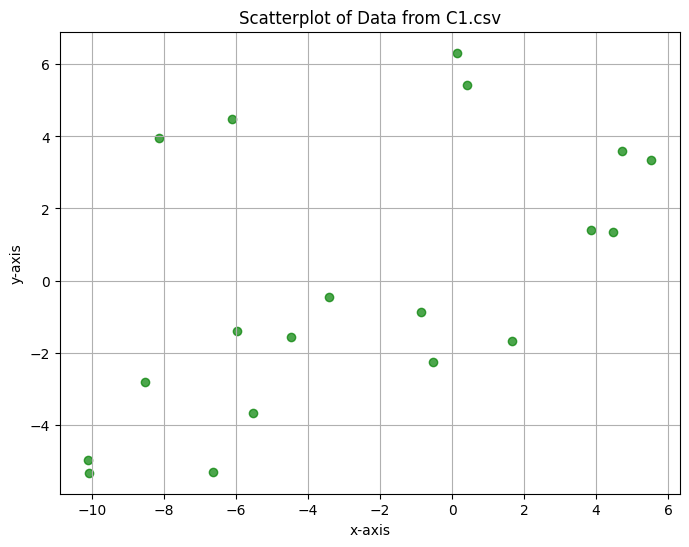

In [3]:
# QUESTION 1

plt.figure(figsize=(8, 6))
plt.scatter(d["x"], d["y"], color='green', alpha=0.7)
plt.title("Scatterplot of Data from C1.csv")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid(True)
plt.show()

In [4]:
# single-link hierarchical clustering
# every point is a cluster
# combine the closest two clusters
#   make a dictionary of ordered pairs : distances
#   for all keys
#      if the paired points are in different clusters
#         merge the clusters
# stop when there are four cluster

clusters = set(zip(d['x'], d['y']))
distances_between_points = {}
for pair1 in clusters:
    for pair2 in clusters:
        if pair1 != pair2 and (pair2, pair1) not in distances_between_points:
            distances_between_points[(pair1, pair2)] = np.linalg.norm(np.array(pair1) - np.array(pair2))

In [5]:
def merge_clusters(distances_between_points, clusters, first_run, link):
    if link == 'single':
        #find the pair of points not in the same cluster that are closest together
        #find the max distance/point so we can count down from there
        max_distance = 0
        for pair, distance in distances_between_points.items():
            if distance > max_distance:
                max_distance = distance
                max_distance_pair = pair
    
        #set the farthest-away points as the closest points
        min_distance_so_far = max_distance
        closest_points_so_far = max_distance_pair
        
        for pair, distance in distances_between_points.items():
            same_cluster = False
            for cluster in clusters:
                if (pair[0] in cluster and pair[1] in cluster):
                    same_cluster = True
                    break
            if not same_cluster and distance < min_distance_so_far:
                min_distance_so_far = distance
                closest_points_so_far = pair
    
        distance_between_closest_clusters = min_distance_so_far
        closest_clusters_representative_points = closest_points_so_far

    if first_run:
        clusters_list = list(clusters)
        clusters_list_of_sets = []
        for i in clusters_list:
            clusters_list_of_sets.append({i})
    else:
        clusters_list_of_sets = clusters

    if link == 'complete':
        #distances_between_points is a dictionary of tuples of tuples to floats
        #clusters is a list of sets of tuples
        #output closest_clusters_representative_points, a tuple of tuples
        cluster_dists = {}
        for cluster1 in clusters_list_of_sets:
            for cluster2 in clusters_list_of_sets:
                if cluster1 != cluster2:
                    max_dist = 0
                    for point1 in cluster1:
                        for point2 in cluster2:
                            dist = np.linalg.norm(np.array(point1) - np.array(point2))
                            if dist > max_dist:
                                max_dist = dist
                                rep_point1 = point1
                                rep_point2 = point2
                    cluster_dists[(rep_point1, rep_point2)] = max_dist
        closest_clusters_representative_points = min(cluster_dists, key=cluster_dists.get)
    
    new_clusters = []
    for cluster in clusters_list_of_sets:
        if closest_clusters_representative_points[0] in cluster:
            to_merge1 = cluster
        elif closest_clusters_representative_points[1] in cluster:
            to_merge2 = cluster
        else:
            new_clusters.append(cluster)
    new_clusters.append(to_merge1.union(to_merge2))
    return(new_clusters)

In [6]:
# data must be in a pandas dataframe with x-values in the first column and y-values in the second and the headers 'x' and 'y'
def link(data, k, link):
    first_run = True
    clusters = set(zip(data['x'], data['y']))
    distances_between_points = {}
    for pair1 in clusters:
        for pair2 in clusters:
            if pair1 != pair2:
                distances_between_points[(pair1, pair2)] = np.linalg.norm(np.array(pair1) - np.array(pair2))
    
    num_clust = len(clusters)
    while num_clust != k:
        clusters = merge_clusters(distances_between_points, clusters, first_run, link)
        num_clust = len(clusters)
        first_run = False

    return(clusters)

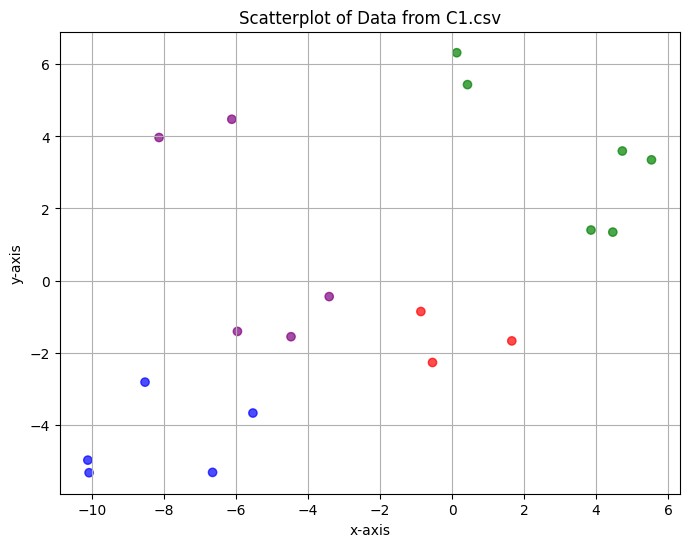

In [7]:
clusters = link(d, 4, 'complete')

colors = ['red', 'blue', 'green', 'purple']

point_colors = []
x = []
y = []

for cluster_number, cluster in enumerate(clusters):
    for point in cluster:
        x.append(point[0])
        y.append(point[1])
        point_colors.append(colors[cluster_number])

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=point_colors, alpha=0.7)
plt.title("Scatterplot of Data from C1.csv")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid(True)
plt.show()

In [8]:
# QUESTION 2

In [9]:
# PART A

d = pd.read_csv('C2.csv', header=None, names=['x','y'])

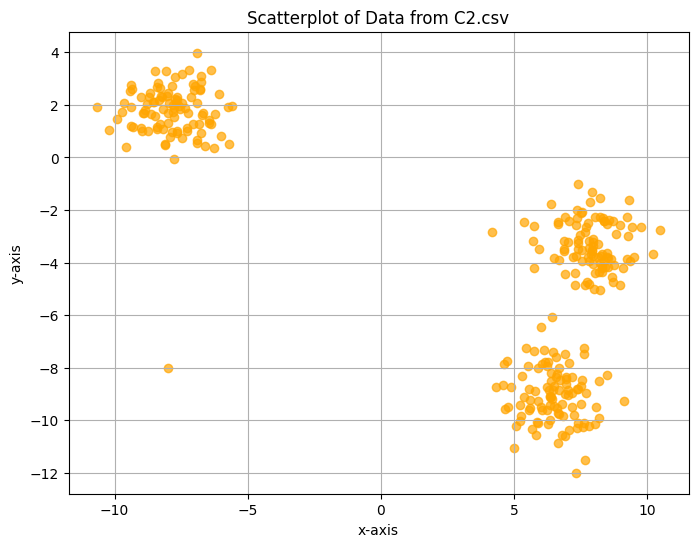

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(d["x"], d["y"], color='orange', alpha=0.7)
plt.title("Scatterplot of Data from C2.csv")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid(True)
plt.show()

In [11]:
def gonzalez(X, k):
    # X: Pandas dataframe of points
    # k: number of centers
    
    # Initialize the list of centers - the assignment said to use the first point in the dataset
    X = X.to_numpy()
    centers = [X[0]]
    
    # Compute distances from the first center to all points
    def distance(a, b):
        return np.linalg.norm(a - b)

    for _ in range(1, k):
        # Calculate the minimum distance to any center for each point
        min_dist = np.array([min(distance(x, c) for c in centers) for x in X])
        
        # Find the point that maximizes this minimum distance (farthest from any center)
        new_center = X[np.argmax(min_dist)]
        centers.append(new_center)

    cluster_assignments = [[np.argmin([distance(X[x], c) for c in centers])] for x in range(len(X))]
    cluster_assignments = [item[0] for item in cluster_assignments]

    centers_cost = max(min_dist)

    means_cost = np.sum(min_dist ** 2) / len(X)

    return np.array(centers), cluster_assignments, centers_cost, means_cost

In [12]:
gonzalez_centers, gonz_cluster_assignments, centers_cost, means_cost = gonzalez(d, 3) #centers gets used later, so don't change the name
print('Selected centers:\n', gonzalez_centers)
print('Centers cost: ', centers_cost)
print('Means cost: ', means_cost)

Selected centers:
 [[ -8.99419326   2.30188689]
 [  7.32325911 -12.00064379]
 [  7.38575675  -1.02379608]]
Centers cost:  10.977025619949357
Means cost:  30.768279114255368


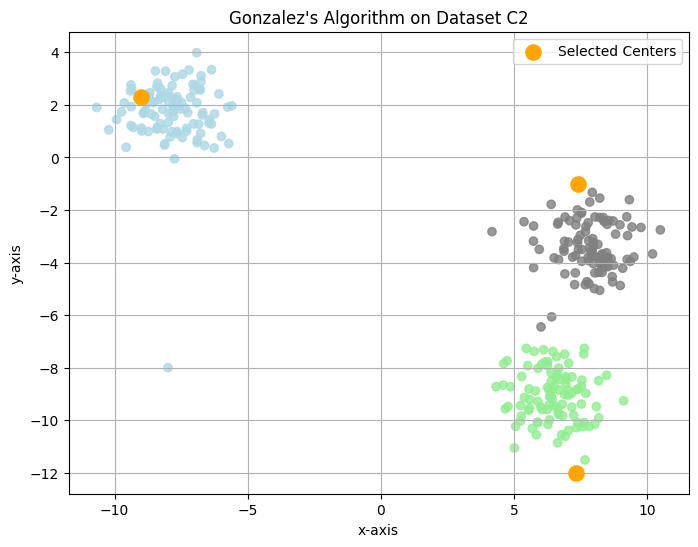

In [13]:
color_map = {0: 'lightblue', 1: 'lightgreen', 2: 'grey'}
colors = [color_map[point] for point in gonz_cluster_assignments]  # map each label to its color

plt.figure(figsize=(8, 6))
plt.scatter(d["x"], d["y"], color=colors, alpha=0.8)
plt.scatter(gonzalez_centers[:, 0], gonzalez_centers[:, 1], color='orange', s=120, label='Selected Centers')
plt.title("Gonzalez's Algorithm on Dataset C2")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid(True)
plt.legend()
plt.show()

In [14]:
# PART B

from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import KMeans

# Function to compute 3-means cost
def compute_cost(X, centers):
    _, dists = pairwise_distances_argmin_min(X, centers) # for each point in the first argument, finds the closest point in the second and returns the point and the distances
    return np.sum(dists ** 2)

# KMeans++ - X for data, k means, s1 for optional first cluster if you'd like to specify it
def run_kmeans_plus_plus(X, k, s1=None):
    X = np.asarray(X)
    n, d = X.shape
    
    #if first site not provided, pick one randomly from the data. Otherwise, use the provided point as the first site.
    if s1 is None:
        idx = np.random.choice(n)
        s1 = X[idx]
    else:
        s1 = np.asarray(s1)

    centers = [s1]
    
    # Choose k-1 more centers using k-means++ style sampling
    for _ in range(1, k):
        _, dists = pairwise_distances_argmin_min(X, np.vstack(centers))
        probs = dists ** 2
        probs /= probs.sum()
        next_idx = np.random.choice(n, p=probs) # p must be a 1-D array-like object of the same length as n for which all elements add to 1. It's the probability distribution for the random choice.
        centers.append(X[next_idx])
    
    return np.vstack(centers)

In [15]:
X = d[['x', 'y']].values
first_center = X[0]
num_trials = 10000

# Run trials - make sure you run the gonzalez algorithm above first so you can compare the chosen centers
costs = []
kmeans_centers_list = []
same_as_gonzalez = []
for _ in range(num_trials):
    kpp_centers = run_kmeans_plus_plus(X, k=3, s1=first_center)
    cost = compute_cost(X, kpp_centers)
    kpp_cluster_assignments, _ = pairwise_distances_argmin_min(X, np.array(kpp_centers))
    comp_with_gonzalez = np.allclose(gonz_cluster_assignments, kpp_cluster_assignments)

    # cluster 0 will always be the same, since we've set both up to start with the first point in the dataset, but Gonzalez's 1 could be KPP's 2 and vice versa. So we have to switch the 1s and the 2s in the KPP cluster assignments and compare it to Gonzalez that way too.
    renumbered = kpp_cluster_assignments
    renumbered[renumbered == 1] = -1
    renumbered[renumbered == 2] = 1
    renumbered[renumbered == -1] = 2
    comp_with_gonzalez_alt = np.allclose(gonz_cluster_assignments, renumbered)

    comp_with_gonzalez |= comp_with_gonzalez_alt

    costs.append(cost)
    kmeans_centers_list.append(kpp_centers)
    same_as_gonzalez.append(comp_with_gonzalez)

frac_same_as_gonzalez = sum(same_as_gonzalez)/len(same_as_gonzalez)
print(frac_same_as_gonzalez)

0.1252


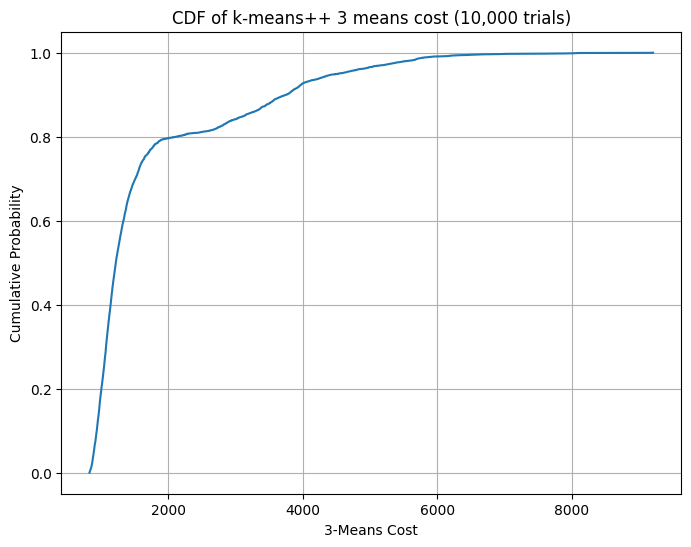

In [16]:
# Plot CDF of 3-means cost
sorted_costs = np.sort(costs)
cdf = np.arange(1, len(sorted_costs)+1) / len(sorted_costs)

plt.figure(figsize=(8, 6))
plt.plot(sorted_costs, cdf)
plt.xlabel("3-Means Cost")
plt.ylabel("Cumulative Probability")
plt.title("CDF of k-means++ 3 means cost (10,000 trials)")
plt.grid(True)
plt.show()

In [17]:
#dataset as numpy array
d_np = d.to_numpy()

#first 3 points in the file
first_three_points = d.head(3).to_numpy()

#output of Gonzalez
#gonzalez_centers

#every output of k-means++
#for center in kmeans_centers_list

In [18]:
first_three_points

array([[-8.99419326,  2.30188689],
       [ 7.04597972, -7.83353716],
       [ 7.97212762, -3.75540854]])

In [19]:
gonzalez_centers

array([[ -8.99419326,   2.30188689],
       [  7.32325911, -12.00064379],
       [  7.38575675,  -1.02379608]])

In [20]:
kmeans_centers_list[4]

array([[ -8.99419326,   2.30188689],
       [  7.32325911, -12.00064379],
       [  8.63983342,  -3.85382244]])

In [21]:
def lloyd_iteration(X, centers): #X is the numpy array of all points in the dataset, centers is a numpy array of centers (X and centers should have the same number of columns, since that's the dimensionality of the data)
    #assign each point to its closest center
    point_assignments_to_clusters, _ = pairwise_distances_argmin_min(X, centers)

    #recompute centers as the mean of assigned points
    k = centers.shape[0]
    new_centers = np.zeros_like(centers)
    for i in range(k):
        points_in_cluster = X[point_assignments_to_clusters == i]
        if len(points_in_cluster) > 0:
            new_centers[i] = points_in_cluster.mean(axis=0)
        else:
            # If no points assigned, keep old center
            new_centers[i] = centers[i]

    return new_centers, point_assignments_to_clusters

In [22]:
def lloyd_complete(X, centers):
    centers_changed = True
    while centers_changed:
        new_centers, point_assignments = lloyd_iteration(X, centers)
        centers_changed = not np.allclose(new_centers, centers, atol=1e-8)
        centers = new_centers
    return centers, point_assignments

In [23]:
def plot_three_clusters(data, clusters, point_assignments, title):
    color_map = {0: 'lightblue', 1: 'lightgreen', 2: 'grey'}
    colors = [color_map[point] for point in point_assignments]  # map each label to its color
    
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:,0], data[:,1], color=colors, alpha=0.8, s=50)
    plt.scatter(clusters[:, 0], clusters[:, 1], color='orange', s=120, label='Selected Centers')
    plt.title(title)
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.grid(True)
    plt.legend()
    plt.show()

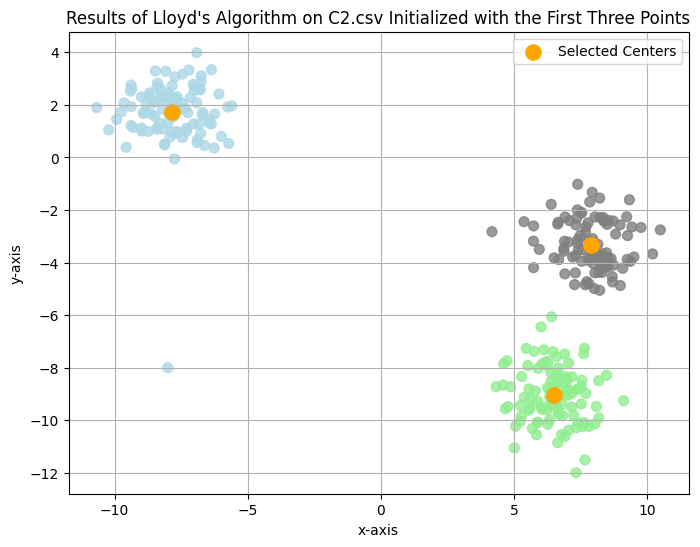

Cost:  653.6285655155993


In [24]:
#C.i. - Lloyd's on first three points in file

lloyds_on_ftp_centers, lloyds_on_ftp_point_assignments = lloyd_complete(d_np, first_three_points)
plot_three_clusters(d_np, lloyds_on_ftp_centers, lloyds_on_ftp_point_assignments, "Results of Lloyd's Algorithm on C2.csv Initialized with the First Three Points")
print('Cost: ', compute_cost(d_np, lloyds_on_ftp_centers))

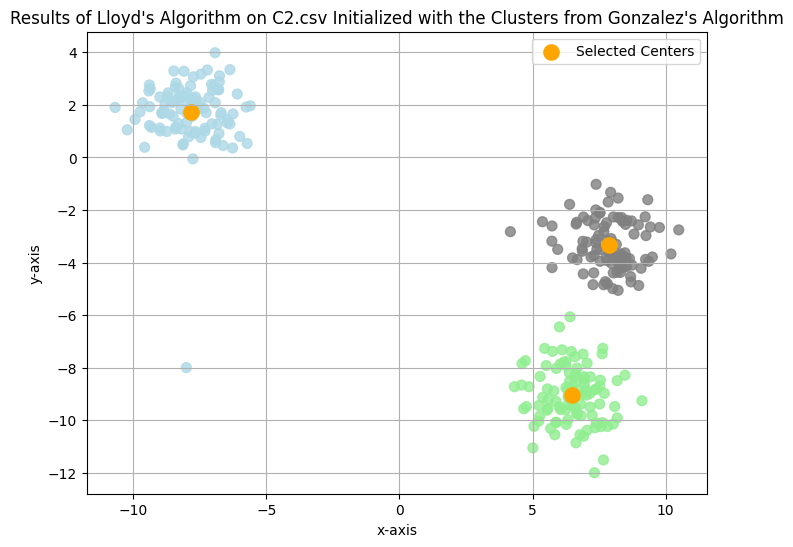

Cost:  653.6285655155993


In [25]:
#C.ii. - Lloyd's on output of Gonzalez

lloyds_on_gonzalez_centers, lloyds_on_gonzalez_point_assignments = lloyd_complete(d_np, gonzalez_centers)
plot_three_clusters(d_np, lloyds_on_gonzalez_centers, lloyds_on_gonzalez_point_assignments, "Results of Lloyd's Algorithm on C2.csv Initialized with the Clusters from Gonzalez's Algorithm")
print('Cost: ', compute_cost(d_np, lloyds_on_gonzalez_centers))

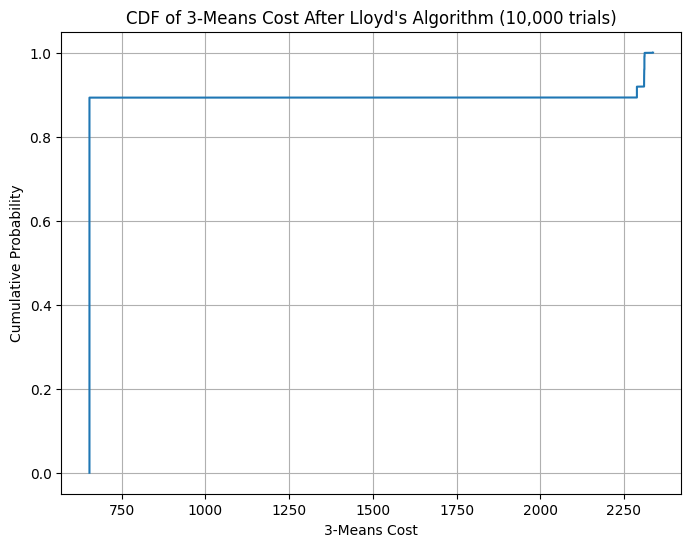

Percent of times K-Means++ and Lloyd's produced the same clusters:  0.3964


In [26]:
#C.iii. - Lloyd's on every output of kmeans++

same_or_not = []
costs = []
for center in kmeans_centers_list:
    lloyds_on_kmeanspp_centers, lloyds_on_kmeanspp_point_assignments = lloyd_complete(d_np, center)
    cost = compute_cost(d_np, lloyds_on_kmeanspp_centers)
    costs.append(cost)

    #find out if k-means++ and Lloyd's produced identical clusters (perhaps not identical centers, but the same points in each cluster)
    kpp_cluster_assignments, _ = pairwise_distances_argmin_min(d_np, np.array(center))
    kpp_and_lloyds_same = np.allclose(kpp_cluster_assignments, lloyds_on_kmeanspp_point_assignments)
    same_or_not.append(kpp_and_lloyds_same)

# Plot CDF of 3-means cost
sorted_costs = np.sort(costs)
cdf = np.arange(1, len(sorted_costs)+1) / len(sorted_costs)

plt.figure(figsize=(8, 6))
plt.plot(sorted_costs, cdf)
plt.xlabel("3-Means Cost")
plt.ylabel("Cumulative Probability")
plt.title("CDF of 3-Means Cost After Lloyd's Algorithm (10,000 trials)")
plt.grid(True)
plt.show()

print("Percent of times K-Means++ and Lloyd's produced the same clusters: ", sum(same_or_not)/len(same_or_not))

In [27]:
#Question 3

#Lloyd's on C3.csv with k-means++ initialization

d3 = pd.read_csv('C3.csv', header=None)

In [28]:
min_k = 1
max_k = 20
n_to_avg = 50

avg_costs = []
for k in range(min_k, max_k + 1):
    costs = []
    for _ in range(n_to_avg):
        q3_kpp_centers = run_kmeans_plus_plus(d3, k)
        q3_l_pp_centers, q3_l_pp_assignments = lloyd_complete(d3, q3_kpp_centers)
        costs.append(compute_cost(d3, q3_l_pp_centers))
    avg_costs.append(np.mean(costs))

In [40]:
len(q3_l_pp_assignments)

242

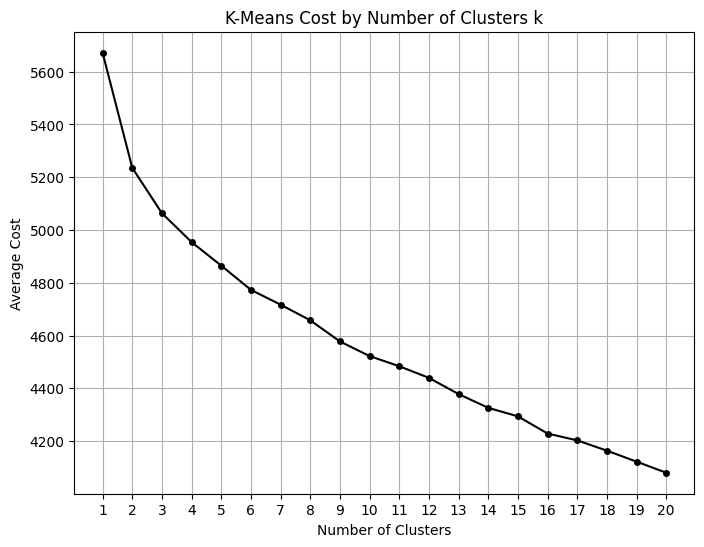

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(list(range(min_k, max_k + 1)), avg_costs, color='black', marker='o', markersize=4)
plt.xticks(range(min_k, max_k + 1))
plt.title("K-Means Cost by Number of Clusters k")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Cost")
plt.grid(True)
plt.show()

In [42]:
#pure chatgpt from here on out

def calculate_rss(data, centers, labels):
    """Compute Residual Sum of Squares"""
    rss = 0.0
    for i, center in enumerate(centers):
        cluster_points = data[labels == i]
        if cluster_points.size > 0:
            rss += np.sum((cluster_points - center) ** 2)
    return rss

def compute_bic(n, rss, k, m):
    """Compute BIC value"""
    p = k * m
    return n * np.log(rss / n) + p * np.log(n)

def choose_optimal_k_bic(d3, lloyd_complete, run_kmeans_plus_plus, k_range=range(1, 11), s1=None):
    """
    Select the optimal number of clusters by minimizing the Bayesian Information Criterion (BIC).
    
    Parameters:
        d3 (pd.DataFrame): Data of shape (n_samples, n_features)
        lloyd_complete (function): Function that takes (data, init_centers) and returns (centers, labels)
        run_kmeans_plus_plus (function): Function to initialize centers using k-means++
        k_range (iterable): Range of cluster counts to evaluate
        s1 (any): Optional random seed for reproducibility
    
    Returns:
        best_k (int): Number of clusters with the lowest BIC
        bic_scores (list): List of (k, BIC value) tuples
    """
    data = d3.values
    n, m = data.shape

    best_k = None
    lowest_bic = float('inf')
    bic_scores = []

    for k in k_range:
        kpp_centers = run_kmeans_plus_plus(data, k, s1=s1)
        centers, labels = lloyd_complete(data, kpp_centers)
        labels = np.array(labels)

        rss = calculate_rss(data, centers, labels)
        bic = compute_bic(n, rss, k, m)

        bic_scores.append((k, bic))

        if bic < lowest_bic:
            lowest_bic = bic
            best_k = k

    return best_k, bic_scores

In [47]:
best_k, bic_scores = choose_optimal_k_bic(d3, lloyd_complete, run_kmeans_plus_plus, k_range=range(1, 15))

print("Best number of clusters:", best_k)
for k, bic in bic_scores:
    print(f"k={k}, BIC={bic:.2f}")

Best number of clusters: 1
k=1, BIC=1312.25
k=2, BIC=1840.30
k=3, BIC=2380.51
k=4, BIC=2924.56
k=5, BIC=3466.78
k=6, BIC=4020.55
k=7, BIC=4560.01
k=8, BIC=5106.09
k=9, BIC=5650.04
k=10, BIC=6192.57
k=11, BIC=6741.82
k=12, BIC=7290.40
k=13, BIC=7836.38
k=14, BIC=8383.01


In [48]:
from sklearn.metrics import silhouette_score

def choose_optimal_k_silhouette(d3, lloyd_complete, run_kmeans_plus_plus, k_range=range(2, 11), s1=None):
    """
    Choose the optimal number of clusters using average silhouette score.

    Parameters:
        d3 (pd.DataFrame): Data of shape (n_samples, n_features)
        lloyd_complete (function): Lloyd’s algorithm implementation
        run_kmeans_plus_plus (function): K-means++ initializer
        k_range (iterable): Range of k to evaluate (must start from 2)
        s1: Optional first center for k-means++

    Returns:
        best_k (int): Optimal number of clusters
        silhouette_scores (list): List of (k, silhouette_score) tuples
    """
    data = d3.values
    silhouette_scores = []
    best_k = None
    best_score = -1

    for k in k_range:
        kpp_centers = run_kmeans_plus_plus(data, k, s1=s1)
        centers, labels = lloyd_complete(data, kpp_centers)
        labels = np.array(labels)

        # Check if all clusters are non-empty
        if len(np.unique(labels)) < 2:
            continue  # Skip invalid clustering

        try:
            score = silhouette_score(data, labels)
        except Exception as e:
            print(f"Silhouette score failed for k={k}: {e}")
            continue

        silhouette_scores.append((k, score))

        if score > best_score:
            best_score = score
            best_k = k

    return best_k, silhouette_scores

In [49]:
best_k, sil_scores = choose_optimal_k_silhouette(
    d3,
    lloyd_complete,
    run_kmeans_plus_plus,
    k_range=range(2, 15),
)

print("Best number of clusters (silhouette):", best_k)
for k, score in sil_scores:
    print(f"k={k}, silhouette={score:.4f}")

Best number of clusters (silhouette): 2
k=2, silhouette=0.0688
k=3, silhouette=0.0498
k=4, silhouette=0.0556
k=5, silhouette=0.0499
k=6, silhouette=0.0140
k=7, silhouette=0.0377
k=8, silhouette=0.0599
k=9, silhouette=0.0533
k=10, silhouette=0.0259
k=11, silhouette=0.0486
k=12, silhouette=0.0361
k=13, silhouette=0.0386
k=14, silhouette=0.0174


In [80]:
import matplotlib.pyplot as plt
import numpy as np

def plot_merge_distances_clusters_axis(Z, n_samples, start_merge=1, max_merges=None):
    """
    Plot merge distances from hierarchical clustering linkage matrix,
    with x-axis showing number of clusters (descending).

    Parameters:
        Z (ndarray): Linkage matrix from scipy.cluster.hierarchy.linkage
        n_samples (int): Number of original samples
        start_merge (int): Merge step to start plotting from (1-based index)
        max_merges (int or None): Number of merges to display starting from start_merge.
                                  If None, plots until the end.
    """
    merge_distances = Z[:, 2]
    n_merges = len(merge_distances)

    start_idx = start_merge - 1
    if start_idx < 0 or start_idx >= n_merges:
        raise ValueError(f"start_merge must be between 1 and {n_merges}")

    if max_merges is None:
        end_idx = n_merges
    else:
        end_idx = min(start_idx + max_merges, n_merges)

    # Number of clusters = total samples - merge step
    merge_steps = np.arange(start_idx + 1, end_idx + 1)
    clusters = n_samples - merge_steps  # descending cluster counts
    y = merge_distances[start_idx:end_idx]

    plt.figure(figsize=(10, 4))
    plt.plot(clusters, y, marker='o')
    plt.title("Merge Distances vs Number of Clusters (Single-Link)")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Distance")
    plt.gca().invert_xaxis()  # clusters decrease left to right, invert for natural order
    plt.grid(True)
    plt.show()

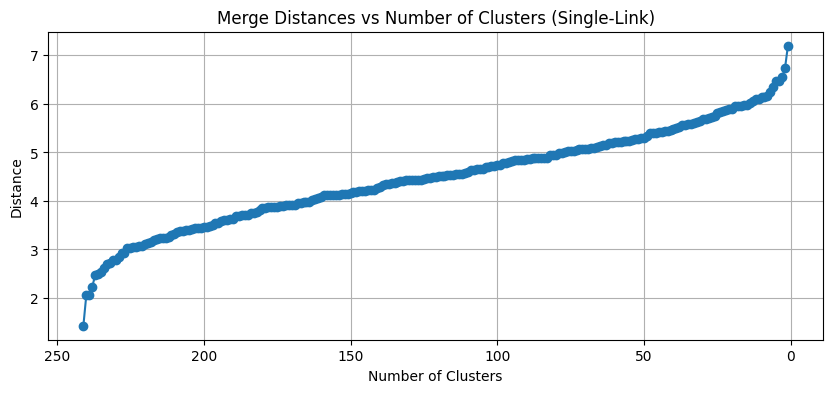

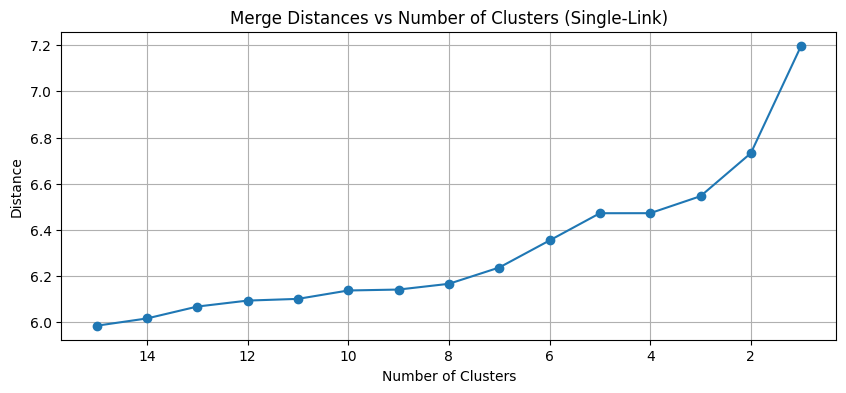

In [81]:
from scipy.cluster.hierarchy import linkage

data = d3.values
Z = linkage(data, method='single')
n_samples = data.shape[0]

# Plot from merge 1 (all merges) with cluster count x-axis
plot_merge_distances_clusters_axis(Z, n_samples)

# Or zoom in (e.g., merges 50 to 100)
plot_merge_distances_clusters_axis(Z, n_samples, start_merge=227, max_merges=242)